### EDA!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
from tqdm import tqdm
from keras.utils import np_utils
import helpers

Using TensorFlow backend.


In [2]:
def crop_and_resize(img, resize_dim=256):
    img=cv2.resize(img,(resize_dim,resize_dim),interpolation=cv2.INTER_AREA)
    return img

def get_data(path):
    img=cv2.imread(path)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img=crop_and_resize(img)
    return img

In [3]:
#Root directory of the project
ROOT_DIR = os.path.abspath(".")
# Training file directory
DATASET = os.path.join(ROOT_DIR, 'dataset')
OUTPUTS = os.path.join(ROOT_DIR, 'outputs')
DATASET, OUTPUTS

('C:\\Users\\Hasib\\Desktop\\works\\lesion-learnt\\dataset',
 'C:\\Users\\Hasib\\Desktop\\works\\lesion-learnt\\outputs')

In [8]:
os.listdir(DATASET + "/isic2016")

['ISBI2016_ISIC_Part3_Test_Data',
 'ISBI2016_ISIC_Part3_Test_GroundTruth.csv',
 'ISBI2016_ISIC_Part3_Training_Data',
 'ISBI2016_ISIC_Part3_Training_GroundTruth.csv']

In [5]:
# IMAGES PATH
IMAGES = os.path.join(DATASET, 'isic2016', 'ISBI2016_ISIC_Part3_Training_Data')
# GROUND TRUTH PATH
GT = os.path.join(DATASET, 'isic2016', 'ISBI2016_ISIC_Part3_Training_GroundTruth.csv')
len(os.listdir(IMAGES)), len(os.listdir(IMAGES))

(900, 900)

In [6]:
# Read the metadata
df = pd.read_csv(GT, sep=',', names=["FILENAME", "CLASS"])
df.head()

,FILENAME,CLASS
0,ISIC_0000000,benign
1,ISIC_0000001,benign
2,ISIC_0000002,malignant
3,ISIC_0000004,malignant
4,ISIC_0000006,benign


In [7]:
# filenames and gts
filenames = df['FILENAME'].values
gt = df['CLASS'].values
len(gt)

900

In [8]:
filenames[:6]

array(['ISIC_0000000', 'ISIC_0000001', 'ISIC_0000002', 'ISIC_0000004',
       'ISIC_0000006', 'ISIC_0000007'], dtype=object)

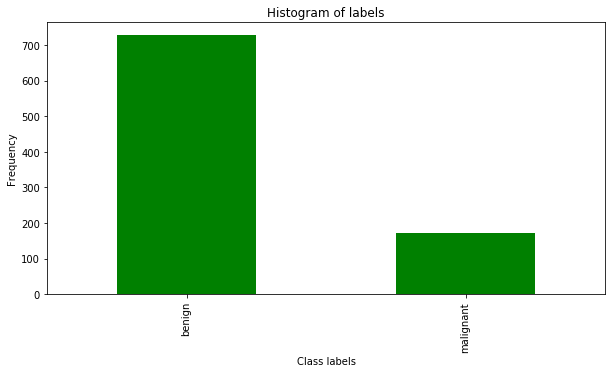

In [37]:
fig, ax = plt.subplots(1, 1, figsize= (10, 5))
df['CLASS'].value_counts().plot(kind='bar', ax=ax, title="Histogram of labels", color='g')

helpers.create_directory("{}/outputs".format(ROOT_DIR))
ax.set_xlabel("Class labels")
ax.set_ylabel("Frequency")
plt.savefig("{}/outputs/numberofclcasses.pdf".format(ROOT_DIR), dpi=300)

In [10]:
gt[:10]

array(['benign', 'benign', 'malignant', 'malignant', 'benign', 'benign',
       'benign', 'benign', 'benign', 'benign'], dtype=object)

In [11]:
filenames[:10]

array(['ISIC_0000000', 'ISIC_0000001', 'ISIC_0000002', 'ISIC_0000004',
       'ISIC_0000006', 'ISIC_0000007', 'ISIC_0000008', 'ISIC_0000009',
       'ISIC_0000010', 'ISIC_0000011'], dtype=object)

In [12]:
labels = []
for s in gt:
    if s == "benign" or s == 0.0 :
        labels.append(0)
    if s == "malignant" or s == 1.0:
        labels.append(1)
        
len(labels)

900

In [13]:
labels[:10]

[0, 0, 1, 1, 0, 0, 0, 0, 0, 0]

In [14]:
inp_feat = []
g_t = []


cancer = []
non_cancer = []

for f, l in tqdm(zip(filenames[:], labels[:])):
    f = "{}/{}.jpg".format(IMAGES, f)
    img = get_data(f)
    inp_feat.append(img)
    g_t.append(l)
    if l == 1:
        cancer.append(img)
    if l == 0:
        non_cancer.append(img)
    else:
        pass
    img = None

# make nummpy arrays
#inp_feat = np.array(inp_feat)
#g_t = np.array(g_t)

cancer = np.array(cancer)
non_cancer = np.array(non_cancer)

#print(inp_feat.shape, g_t.shape)
print(cancer.shape, non_cancer.shape)

900it [01:28, 10.22it/s]


(173, 256, 256, 3) (727, 256, 256, 3)


In [15]:
#inp_feat.shape, g_t.shape

In [34]:
x = cancer[10:30]

a, b = 2, 10
x = np.reshape(x, (a, b, 256, 256, 3))

y = non_cancer[10:30]
y = np.reshape(y, (a, b, 256, 256, 3))

x.shape, y.shape

((2, 10, 256, 256, 3), (2, 10, 256, 256, 3))

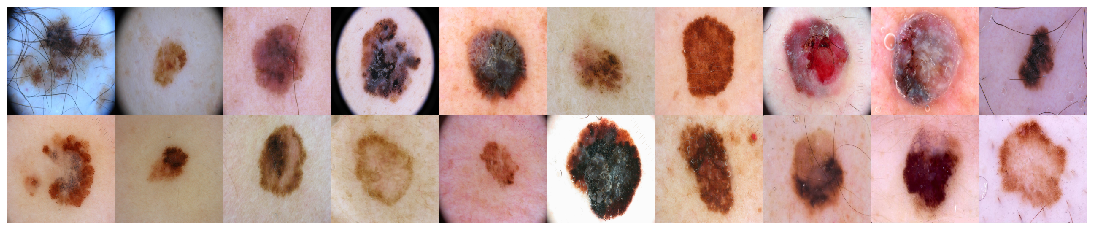

In [41]:
from numpy.random import rand
import matplotlib.pyplot as plt

test_data = x
r, c = test_data.shape[0], test_data.shape[1]
#test_data = np.array([[cancer[0], cancer[0]],[cancer[0], cancer[0]],[cancer[0], cancer[0]]])
#test_data = np.array([[rand(10,10), rand(10,10)],[rand(5,10), rand(5,10)],[rand(2,10), rand(2,10)]])
cmaps = [['viridis', 'binary'], ['plasma', 'coolwarm'], ['Greens', 'copper']]

heights = [a[0].shape[0] for a in test_data]
widths = [a.shape[1] for a in test_data[0]]

fig_width = 15.  # inches
fig_height = fig_width * sum(heights) / sum(widths)

f, axarr = plt.subplots(r,c, figsize=(fig_width, fig_height),
        gridspec_kw={'height_ratios':heights})

for i in range(r):
    for j in range(c):
        axarr[i, j].imshow(test_data[i][j])
        axarr[i, j].axis('off')
plt.subplots_adjust(wspace=0, hspace=0, left=0, right=1, bottom=0, top=1)
plt.savefig('{}/{}.pdf'.format("{}/outputs/".format(ROOT_DIR), "cancer"), dpi=300)
plt.show()

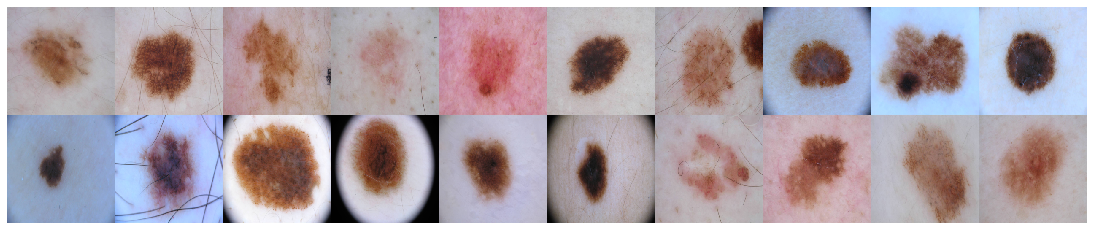

In [40]:
from numpy.random import rand
import matplotlib.pyplot as plt

test_data = y
r, c = test_data.shape[0], test_data.shape[1]
#test_data = np.array([[cancer[0], cancer[0]],[cancer[0], cancer[0]],[cancer[0], cancer[0]]])
#test_data = np.array([[rand(10,10), rand(10,10)],[rand(5,10), rand(5,10)],[rand(2,10), rand(2,10)]])
cmaps = [['viridis', 'binary'], ['plasma', 'coolwarm'], ['Greens', 'copper']]

heights = [a[0].shape[0] for a in test_data]
widths = [a.shape[1] for a in test_data[0]]

fig_width = 15.  # inches
fig_height = fig_width * sum(heights) / sum(widths)

f, axarr = plt.subplots(r,c, figsize=(fig_width, fig_height),
        gridspec_kw={'height_ratios':heights})

for i in range(r):
    for j in range(c):
        axarr[i, j].imshow(test_data[i][j])
        axarr[i, j].axis('off')
plt.subplots_adjust(wspace=0, hspace=0, left=0, right=1, bottom=0, top=1)
plt.savefig('{}/{}.pdf'.format("{}/outputs/".format(ROOT_DIR), "noncancer"), dpi=300)
plt.show()

In [31]:
#helpers.show_images(cancer[:20], cols = 4, titles = None, save_fig = "cancer_samples", path="{}/outputs/".format(ROOT_DIR))

In [30]:
#helpers.show_images(non_cancer[:20], cols = 4, titles = None, save_fig = "normal_samples", path="{}/outputs/".format(ROOT_DIR))

In [18]:
# one hot encoded vectors
num_classes = 2
g_t_cat = np_utils.to_categorical(g_t,num_classes)
print(g_t_cat.shape)

(900, 2)


In [19]:
flat = np.array([np.argmax(pred) for pred in g_t_cat])
np.count_nonzero(flat == 1), np.count_nonzero(flat == 0)

(173, 727)

In [20]:
g_t_cat[:4]

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)

C:\Users\Hasib\Anaconda3\envs\skin\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


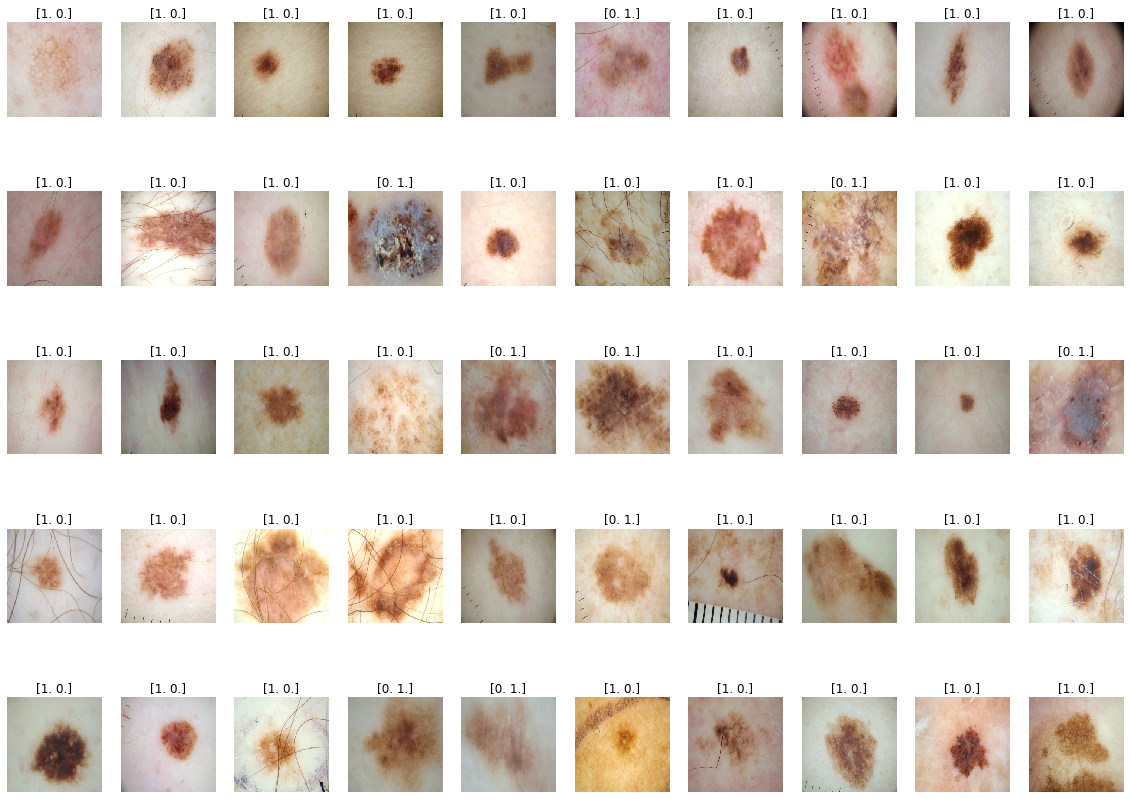

In [21]:
helpers.imshow_group(inp_feat[-50:], g_t_cat[-50:])

In [22]:
inp_feat.shape, g_t_cat.shape

((900, 256, 256, 3), (900, 2))

In [23]:
img_3d = inp_feat[0]
img_flat = img_3d.flatten()
print(min(img_flat), max(img_flat))

20 255


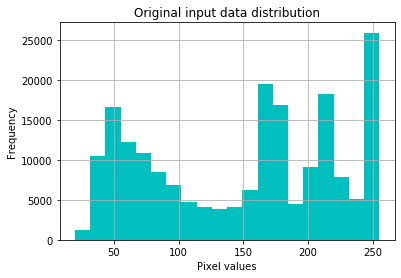

In [25]:
plt.hist(img_flat, bins=20, color='c')
plt.title("Original input data distribution")
plt.xlabel("Pixel values")
plt.grid(True)
plt.ylabel("Frequency")
plt.show()

In [14]:
# Test images path
TEST_IMAGES = os.path.join(DATASET, 'isic2016', 'ISBI2016_ISIC_Part3_Test_Data')
# Ground truth path
TEST_GT = os.path.join(DATASET, 'isic2016', 'ISBI2016_ISIC_Part3_Test_GroundTruth.csv')
# Read the metadata
TEST_META = pd.read_csv(TEST_GT, sep=',', names=["FILENAME", "CLASS"])

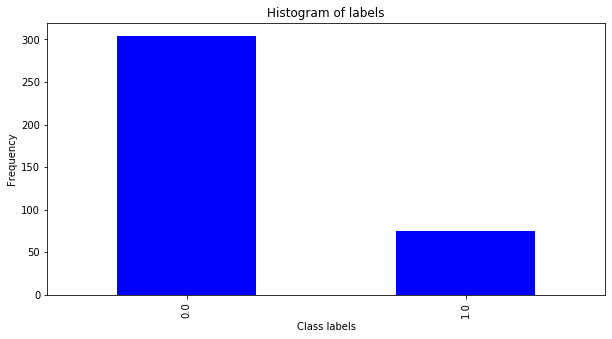

In [20]:
fig, ax = plt.subplots(1, 1, figsize= (10, 5))
TEST_META['CLASS'].value_counts().plot(kind='bar', ax=ax, title="Histogram of labels", color='b')

helpers.create_directory("{}/outputs".format(ROOT_DIR))
ax.set_xlabel("Class labels")
ax.set_ylabel("Frequency")
plt.savefig("{}/outputs/test_setnumberofclcasses.png".format(ROOT_DIR), dpi=100)

In [30]:
# filenames and gts
filenames = TEST_META['FILENAME'].values
gt = TEST_META['CLASS'].values

# convert string labels to numeric values
labels = []
for s in gt:
    if s == "benign" or s == 0.0 :
        labels.append(0)
    if s == "malignant" or s == 1.0:
        labels.append(1)

# all training images and labels     
inp_feat = []
g_t = []

# two classes individually
cancer = []
non_cancer = []

for f, l in tqdm(zip(filenames[:], labels[:])):
    f = "{}/{}.jpg".format(TEST_IMAGES, f)
    img = get_data(f)
    inp_feat.append(img)
    g_t.append(l)

    #----------------
    if l == 1:
        cancer.append(img)
    if l == 0:
        non_cancer.append(img)
    else:
        pass
    #-----------------

    img = None

# make nummpy arrays
inp_feat = np.array(inp_feat)
g_t = np.array(g_t)

# one hot encoded vectors
num_classes = 2
g_t = np_utils.to_categorical(g_t,num_classes)

cancer = np.array(cancer)
non_cancer = np.array(non_cancer)

print(inp_feat.shape, g_t.shape)

379it [00:17, 22.24it/s]


(379, 256, 256, 3) (379, 2)


In [32]:
print(cancer.shape, non_cancer.shape)

(75, 256, 256, 3) (304, 256, 256, 3)


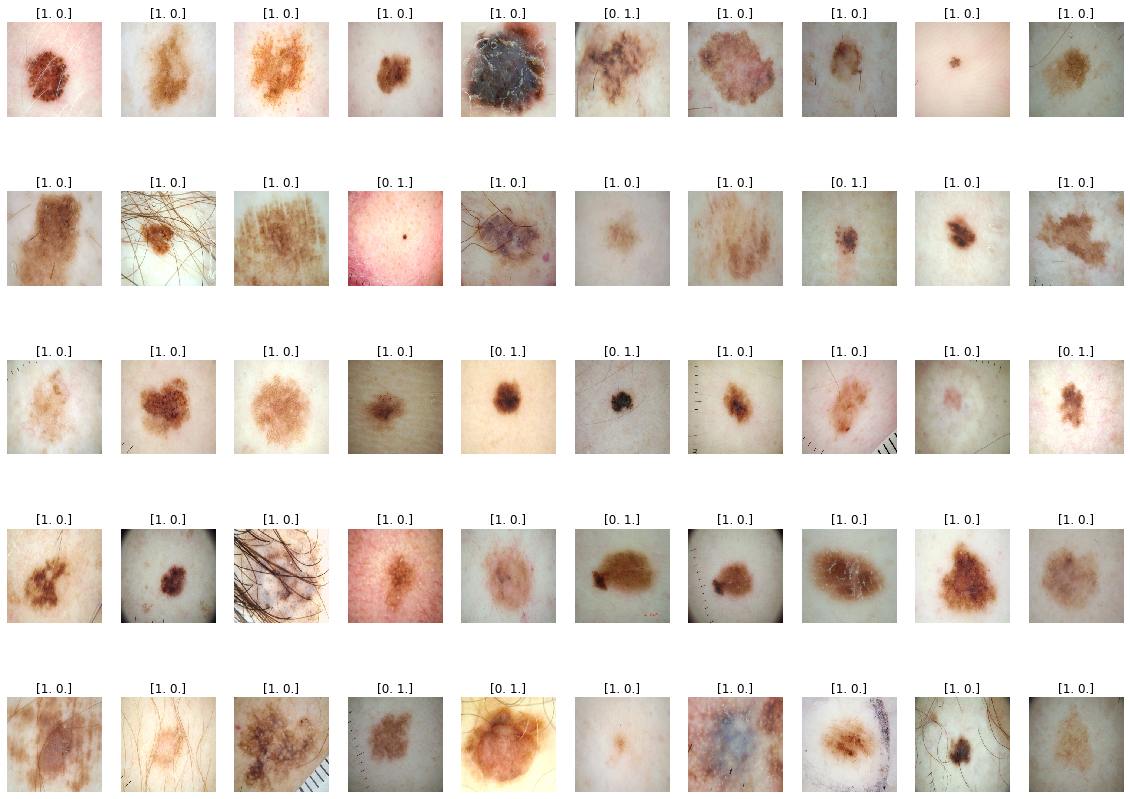

In [31]:
helpers.imshow_group(inp_feat[-50:], g_t_cat[-50:])

### Some fancy graphs 

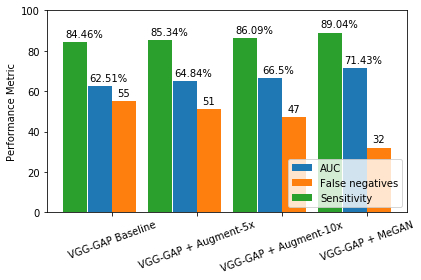

In [19]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

labels = ['VGG-GAP Baseline', 'VGG-GAP + Augment-5x', 'VGG-GAP + Augment-10x', 'VGG-GAP + MeGAN']
auc = [62.51, 64.84, 66.50, 71.43]
postive_misslcass = [55, 51, 47, 32]
sensitivity = [84.46, 85.34, 86.09, 89.04]

x = np.arange(len(labels))  # the label locations
width = 0.28  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, auc, width, label='AUC')
rects2 = ax.bar(x + width/2, postive_misslcass, width, label='False negatives')
rects3 = ax.bar(x - width/2 * 3.08, sensitivity, width, label='Sensitivity')

ax.set_ylabel('Performance Metric')
#ax.set_title('Results')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=20)
ax.legend(loc='lower right')
ax.set_ylim([0,100])
ax.grid(True)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        

def autolabel_(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}%'.format(height),
                    xy=( 0.1 + rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel_(rects3) # %
autolabel(rects2)
autolabel_(rects1) # %

fig.tight_layout()
plt.grid(False)
plt.savefig("{}/outputs/results.pdf".format(ROOT_DIR), dpi=300)
plt.show()

In [4]:
import pickle

def save_obj(obj, name):
    with open('{}/'.format(OUTPUTS) + name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)


def load_obj(name):
    with open('{}/'.format(OUTPUTS) + name + '.pkl', 'rb') as f:
        return pickle.load(f)

def get_unique(arr):
  '''
  Return unique elements in list
  '''
  arr = set(arr)
  return arr

#raw_features = load_obj('raw_features')
#target = load_obj('target')

In [5]:
exp1 = load_obj('1')
exp2 = load_obj('2')
exp3 = load_obj('3')
exp4 = load_obj('4')
exp1

{'fpr': array([0.        , 0.        , 0.        , 0.01333333, 0.01333333,
        0.02666667, 0.02666667, 0.04      , 0.04      , 0.05333333,
        0.05333333, 0.06666667, 0.06666667, 0.08      , 0.08      ,
        0.09333333, 0.09333333, 0.10666667, 0.10666667, 0.12      ,
        0.12      , 0.13333333, 0.13333333, 0.14666667, 0.14666667,
        0.16      , 0.16      , 0.17333333, 0.17333333, 0.18666667,
        0.18666667, 0.2       , 0.2       , 0.21333333, 0.21333333,
        0.22666667, 0.22666667, 0.24      , 0.24      , 0.25333333,
        0.25333333, 0.26666667, 0.26666667, 0.28      , 0.28      ,
        0.29333333, 0.29333333, 0.30666667, 0.30666667, 0.32      ,
        0.32      , 0.33333333, 0.33333333, 0.34666667, 0.34666667,
        0.36      , 0.36      , 0.37333333, 0.37333333, 0.38666667,
        0.38666667, 0.4       , 0.4       , 0.41333333, 0.41333333,
        0.42666667, 0.42666667, 0.46666667, 0.46666667, 0.48      ,
        0.48      , 0.49333333, 0.4933333

In [37]:
lw

2

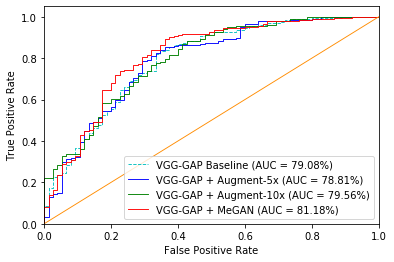

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp


lw = .9
plt.figure()
labels = ['VGG-GAP Baseline', 'VGG-GAP + Augment-5x', 'VGG-GAP + Augment-10x', 'VGG-GAP + MeGAN']
plt.plot(exp1["fpr"], exp1["tpr"], color='c', lw=lw, linestyle = "--", label='VGG-GAP Baseline (AUC = {0:.2f}%)'.format(exp1["roc_auc"] * 100))
plt.plot(exp2["fpr"], exp2["tpr"], color='b', lw=lw, label='VGG-GAP + Augment-5x (AUC = {0:.2f}%)'.format(exp2["roc_auc"] * 100))
plt.plot(exp3["fpr"], exp3["tpr"], color='g', lw=lw, label='VGG-GAP + Augment-10x (AUC = {0:.2f}%)'.format(exp3["roc_auc"] * 100))
plt.plot(exp4["fpr"], exp4["tpr"], color='r', lw=lw,label='VGG-GAP + MeGAN (AUC = {0:.2f}%)'.format(exp4["roc_auc"] * 100))

plt.plot([0, 1], [0, 1], color='darkorange', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.savefig("{}/auc.pdf".format(OUTPUTS), dpi=300)
plt.show()